In [310]:
from sklearn import preprocessing
from MyLSTM import MyLSTM
from datetime import datetime
from backTesting import algo2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

In [311]:
df = pd.read_csv('/Users/bowen/Desktop/H/deeplearninveststrat/Data/100_clean.csv', index_col=0)
timeline = df[df['gvkey']==1209]['Date'].values.tolist()
df.drop(['Ticker','Date', 'Adjusted Close', 'Volume'], axis = 1, inplace=True)

In [312]:
X_train_total = []
Y_train_total = []

X_test_total = []
Y_test_total = []

seq_len = 12
keys = list(df['gvkey'].unique())
keys.remove(8214)
keys.remove(15350)

used_keys = list()
norm_dict = {}


for key in keys:
    df_temp = df[df['gvkey'] == key].drop(['gvkey'], axis=1)
    if len(df_temp) != 115:
        print(f'we drop the {key}')
        continue

    # Some columns have all Nan
    if df_temp.isnull().all().any():
        print(f'we drop the {key}')
        continue

    used_keys.append(key)

    df_temp.ffill(inplace=True)
    norm_vector = df_temp.abs().max(axis=0).values
    # When a columns is all 0s, its max will be 0. We cannot divide by 0 so replace with 1.
    norm_vector[norm_vector == 0] = 1
    norm_dict[key] = norm_vector
    # Some columns have all 0s so dividing will introduce Nan
    df_temp = df_temp / norm_vector

    if df_temp.isnull().any().any():
        print(key, 'null')

    X_list = list()
    Y_list = list()
    #len(df_temp) is 115
    for i in range(len(df_temp) - seq_len - 1):
        X_list += [df_temp.iloc[i:i + seq_len].values]
        Y_list += [df_temp.iloc[i + seq_len + 1, -1]]

    X = np.array(X_list)
    Y = np.array(Y_list)
    # First 71 quarters are for training
    # The 72nd quarter starts to test
    # Some gvkeys have no insufficient data (dont have 12 quarters of data).
    # >=5 to ensure there is testing data.
    if X.shape[0] >= 5:
                              
        X_train = X[:int(len(X) * 0.7)]
        X_test = X[int(len(X) * 0.7):]

        Y_train = Y[:int(len(X) * 0.7)]
        Y_test = Y[int(len(X) * 0.7):]

        X_train_total += [X_train]
        X_test_total += [X_test]

        Y_train_total += [Y_train]
        Y_test_total += [Y_test]

we drop the 2698
we drop the 5680
we drop the 5709
we drop the 5903
we drop the 6135
we drop the 8092
we drop the 10565
we drop the 11012
we drop the 11017
we drop the 12304
we drop the 12785
we drop the 13400
we drop the 13679
we drop the 17175
we drop the 17422
we drop the 19602
we drop the 21807
we drop the 21824
we drop the 22964
we drop the 23109
we drop the 23337
we drop the 24552
we drop the 25740
we drop the 25750
we drop the 28347
we drop the 30241
we drop the 32796
we drop the 33047
we drop the 33048
we drop the 33068
we drop the 33081
we drop the 33150
we drop the 33279
we drop the 33652
we drop the 105394
we drop the 107154
we drop the 107245
we drop the 107712
we drop the 107781
we drop the 108768
we drop the 108831
we drop the 115044
we drop the 134305
we drop the 143770
we drop the 146659
we drop the 148239
we drop the 149683
we drop the 162453
we drop the 162914
we drop the 163596
we drop the 170920
we drop the 174428
we drop the 185323
we drop the 185689
we drop the 18

In [313]:
X_train_total = np.vstack(X_train_total)
X_test_total = np.vstack(X_test_total)

Y_train_total = np.concatenate(Y_train_total)
Y_test_total = np.concatenate(Y_test_total)

In [314]:
# for i in [X_train_total,Y_train_total,  X_test_total, Y_test_total]:
#     print(f'shape is {i.shape}')

shape is (2982, 12, 17)
shape is (2982,)
shape is (1302, 12, 17)
shape is (1302,)


In [315]:
myTimeLine = timeline[71+12+1:]

## Model

In [325]:
parameters = {'hm_epochs': 180,
              'n_batches':4,
              'rnn_size': 64,
              'num_layers': 1,
             'attention': False}

a = MyLSTM(X_train_total, X_test_total, Y_train_total, Y_test_total, parameters)
result = a.train_neural_network()

Epoch 0 completed out of 180 loss: 2.2073222249746323
Epoch 1 completed out of 180 loss: 1.736979067325592
Epoch 2 completed out of 180 loss: 0.7548550739884377
Epoch 3 completed out of 180 loss: 0.9039488583803177
Epoch 4 completed out of 180 loss: 0.5335955545306206
Epoch 5 completed out of 180 loss: 0.618475891649723
Epoch 6 completed out of 180 loss: 0.4577331468462944
Epoch 7 completed out of 180 loss: 0.4383341819047928
Epoch 8 completed out of 180 loss: 0.40097466856241226
Epoch 9 completed out of 180 loss: 0.3699182793498039
Epoch 10 completed out of 180 loss: 0.3666232079267502
Epoch 11 completed out of 180 loss: 0.3373667523264885
Epoch 12 completed out of 180 loss: 0.3322315886616707
Epoch 13 completed out of 180 loss: 0.3192125894129276
Epoch 14 completed out of 180 loss: 0.3178119920194149
Epoch 15 completed out of 180 loss: 0.30798225849866867
Epoch 16 completed out of 180 loss: 0.3032173700630665
Epoch 17 completed out of 180 loss: 0.2987549528479576
Epoch 18 completed o

Epoch 149 completed out of 180 loss: 0.25277021899819374
Epoch 150 completed out of 180 loss: 0.25273966416716576
Epoch 151 completed out of 180 loss: 0.2527092956006527
Epoch 152 completed out of 180 loss: 0.25267936289310455
Epoch 153 completed out of 180 loss: 0.2526496946811676
Epoch 154 completed out of 180 loss: 0.25262022018432617
Epoch 155 completed out of 180 loss: 0.2525910399854183
Epoch 156 completed out of 180 loss: 0.2525622695684433
Epoch 157 completed out of 180 loss: 0.25253354012966156
Epoch 158 completed out of 180 loss: 0.2525052912533283
Epoch 159 completed out of 180 loss: 0.25247717276215553
Epoch 160 completed out of 180 loss: 0.25244931131601334
Epoch 161 completed out of 180 loss: 0.25242171436548233
Epoch 162 completed out of 180 loss: 0.25239428505301476
Epoch 163 completed out of 180 loss: 0.25236714258790016
Epoch 164 completed out of 180 loss: 0.2523401826620102
Epoch 165 completed out of 180 loss: 0.2523134797811508
Epoch 166 completed out of 180 loss: 0

## Process Output

In [326]:
# Splits pred_result into blocks of 31
pred_result_split = np.split(result, len(result) / 31)
pred_result_dict = dict(zip(used_keys, pred_result_split))
pred_result = pd.DataFrame.from_dict(pred_result_dict, orient='index').T
pred_result['Date'] = myTimeLine
pred_result['Date'] = pd.to_datetime(pred_result['Date'])
pred_result.set_index('Date', inplace = True)
# # Splits Y_test_total into blocks of 31
# Y_test_total_split = np.split(Y_test_total, len(Y_test_total) / 31)
# Y_test_total_dict = dict(zip(used_keys, Y_test_total_split))
# Y_test_total = pd.DataFrame.from_dict(Y_test_total_dict, orient='index').T

In [327]:
df1 = pd.read_csv(
    '/Users/bowen/Desktop/H/deeplearninveststrat/Data/100_clean.csv', index_col=0)
df1 = df1[['gvkey', 'Date', 'Adjusted Close', 'Volume']]
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df1 = df1[df1.index >= datetime.strptime(myTimeLine[0], '%Y-%m-%d')]


df1gb = df1.groupby('gvkey')
final = {}
for key, data in df1gb:
    if key in used_keys:
        data['PredictedNextIndicator'] = pred_result.loc[:, key]
        final[key] = data
        final[key]['PredictedNextIndicator'] = final[key]['PredictedNextIndicator'].shift(
            -1)
        final[key] = final[key].dropna()


ff = final[1209]
for k in used_keys[1:]:
    ff = pd.concat([ff, final[k]])

# BackTesting

In [328]:
spx = pd.read_excel('/Users/bowen/Desktop/myGit/deeplearninveststrat/monthendpricehistory.xls')
spx['Date'] = pd.to_datetime(spx['Date'])
spx.set_index('Date', inplace = True)
spx = spx[['SPX']]
spx = spx[spx.index >= datetime.strptime(myTimeLine[0], '%Y-%m-%d')]
spxInitialShare = 100000000/spx['SPX'].iloc[0]
spx['SPXBench'] = spx['SPX'] * spxInitialShare

In [329]:
df2 = ff.pivot(columns = 'gvkey', values = ['Adjusted Close', 'Volume', 'PredictedNextIndicator'])
periods = len(df2)
prices = df2['Adjusted Close'].values
indicators = df2['PredictedNextIndicator'].values
volume = df2['Volume'].values * 1000000
tickers = df2['Volume'].columns.values

In [330]:
mm = algo2(prices[0, :], indicators[0, :], volume[0, :], len(tickers), tickers)
for i in range(1, periods):
    print(mm.avail_capital)
    mm.process_new_data(prices[i, :], indicators[i, :], volume_monthly[i, :])

282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
282.316666662693
Month12 stock 5256 avaliable capital is 18350757.116666663, the volums is 33080842000000.0
Month12 stock 7154 avaliable capital is 31232839.57666666, the volums is 329664826000000.0
Month12 stock 7277 avaliable capital is 36444509.77666666, the volums is 453527000000.0
Month12 stock 5252 avaliable capital is 52867884.559999995, the volums is 18681926000000.0
Month12 stock 5597 avaliable capital is 72074809.44, the volums is 66304444000000.0
Month12 stock 4060 avaliable capital is 84943651.44, the volums is 623351901000000.0
291.459999980405
291.459999980405
291.459999980405
Month15 stock 15247 avaliable capital is 16596515.509999981, the volums is 487340995000000.0
42.429999981075525
42.429999981075525
Month17 stock 8549 avaliable capital is 7688489.029999981, the volums is 38705595700

In [331]:
port_val = [i for i in mm.port_value.values()]
tt = df2['Adjusted Close'].index.tolist()
portfolio = pd.DataFrame(port_val,tt, columns =['PortfolioValue'])
portfolio.index.name = 'Date'
portfolio = pd.concat([portfolio,spx], axis = 1)
portfolio = portfolio.dropna()

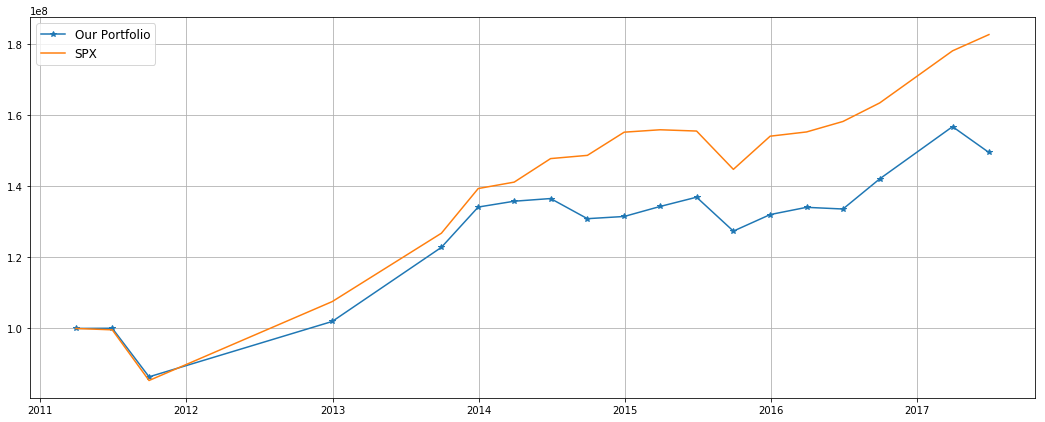

In [332]:
plt.figure(figsize=(18,7))
plt.plot(portfolio['PortfolioValue'],'*-',label='Our Portfolio')
plt.plot(portfolio['SPXBench'],label='SPX')
plt.grid()
plt.legend(loc=0, prop={'size': 12})
plt.show()

In [333]:
pnl = [i-100000000 for i in mm.port_value.values()]
np.mean(pnl)/np.std(pnl, ddof=1)

1.3376694554519535